<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [3]:
#data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
#X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [5]:
Y=data['Class'].to_numpy()

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [6]:
# students get this 
transform = preprocessing.StandardScaler()
X=transform.fit(X).transform(X)
X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

we can see we only have 18 test samples.


In [8]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [9]:
#LR Parameters
parameters_LR ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

#Create Logistic Regression Object
lr=LogisticRegression()

#Create GridSearchCV Object
gridsearch_LR=GridSearchCV(estimator=lr, param_grid=parameters_LR,cv=10)

#Train the model
logreg_cv=gridsearch_LR.fit(X_train,Y_train)


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [10]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
best_params_lr =logreg_cv.best_score_
print("LR best params accuracy :",best_params_lr)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
LR best params accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [11]:
logreg_accscore=logreg_cv.score(X_test, Y_test)
logreg_accscore

0.8333333333333334

Lets look at the confusion matrix:


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Test set LR Jaccard Accuracy:  0.8333333333333334
Test set LR F1 Accuracy: 0.8148148148148149
Test set LR Log_Loss: 0.4786666968559153
 


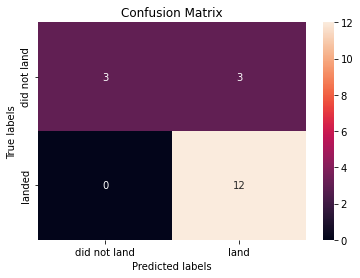

In [12]:
#The Confusion Matrix
lr_yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,lr_yhat)


#Look at Classification Report and metrics
from sklearn.metrics import classification_report
import itertools
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

np.set_printoptions(precision=2)
print (classification_report(Y_test, lr_yhat))

#Predict LR using test dataset & get metrics
pred_lr = logreg_cv.predict(X_test)
#LR Metrics
lr_jaccard = metrics.accuracy_score(Y_test, pred_lr)
lr_f1 = f1_score(Y_test, pred_lr, average='weighted')
#Compute proba to also determine log loss
pred_lrproba = logreg_cv.predict_proba(X_test)
lr_logloss = log_loss(Y_test, pred_lrproba)

#Print Metrics
print("Test set LR Jaccard Accuracy: ", lr_jaccard)
print("Test set LR F1 Accuracy:" , lr_f1)
print("Test set LR Log_Loss:", lr_logloss)
print(" ")


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
#SVM Parameters
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

#Create a SVC Object
svm = SVC()

#Create a GridSearchCV Object
gridsearch_svm=GridSearchCV(svm, parameters_svm, cv=10)

#Train the model
svm_cv= gridsearch_svm.fit(X_train, Y_train)

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
best_params_svm =svm_cv.best_score_
print("SVM best params accuracy :",best_params_svm)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM best params accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
svm_accscore=svm_cv.score(X_test, Y_test)
svm_accscore

0.8333333333333334

We can plot the confusion matrix


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Test set SVM Jaccard Accuracy:  0.8333333333333334
Test set SVM F1 Accuracy: 0.8148148148148149
 


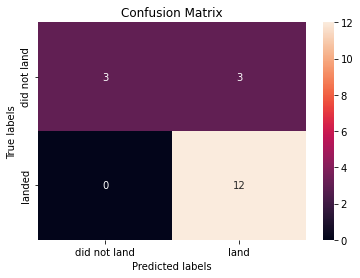

In [16]:
#SVM Confusion Matrix
svm_yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,svm_yhat)


#Look at Classification Report and metrics
np.set_printoptions(precision=2)
print (classification_report(Y_test, svm_yhat))

#Predict SVM using test dataset & get metrics
pred_svm = svm_cv.predict(X_test)
#SVM Metrics
svm_jaccard = metrics.accuracy_score(Y_test, pred_svm)
svm_f1 = f1_score(Y_test, pred_svm, average='weighted')

#Print Metrics 
print("Test set SVM Jaccard Accuracy: ", svm_jaccard)
print("Test set SVM F1 Accuracy:" , svm_f1)
print(" ")



## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
#Decision Tree Parameters
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#Create Decision Tree Object
tree = DecisionTreeClassifier()

#Create a GridSearchCV Object
gridsearch_tree=GridSearchCV(tree, parameters_tree, cv=10)

#Train the model
tree_cv= gridsearch_tree.fit(X_train, Y_train)

In [18]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
best_params_dt=tree_cv.best_score_

print("DT best params accuracy :" ,best_params_dt)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
DT best params accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [19]:
tree_accscore=tree_cv.score(X_test, Y_test)
tree_accscore

0.8888888888888888

We can plot the confusion matrix


              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.92      0.92      0.92        12

    accuracy                           0.89        18
   macro avg       0.88      0.88      0.88        18
weighted avg       0.89      0.89      0.89        18

Test set Tree Jaccard Accuracy:  0.8888888888888888
Test set Tree F1 Accuracy: 0.8888888888888888


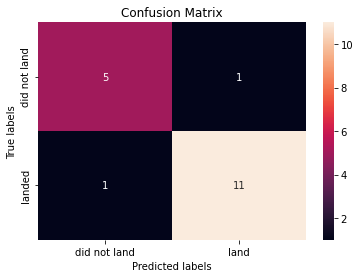

In [20]:
#DT Confusion Matrix
dt_yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,dt_yhat)

#Look at Classification Report and metrics
np.set_printoptions(precision=2)
print (classification_report(Y_test, dt_yhat))

#Predict Tree using test dataset & get metrics
pred_tree = tree_cv.predict(X_test)
#Tree Metrics
dt_jaccard = metrics.accuracy_score(Y_test, pred_tree)
dt_f1 = f1_score(Y_test, pred_tree, average='weighted')

#Print Metrics 
print("Test set Tree Jaccard Accuracy: ", dt_jaccard)
print("Test set Tree F1 Accuracy:" , dt_f1)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
#KNN Parameters
parameters_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

#Create KNN Object
KNN = KNeighborsClassifier()

#Create GridSearchCV Object
gridsearch_KNN=GridSearchCV(estimator=KNN, param_grid=parameters_KNN,cv=10)

#Train the model
knn_cv=gridsearch_KNN.fit(X_train,Y_train)


In [22]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
best_params_knn=knn_cv.best_score_
print("KNN best params accuracy :",best_params_knn)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
KNN best params accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [23]:
knn_accscore=knn_cv.score(X_test, Y_test)
knn_accscore

0.8333333333333334

We can plot the confusion matrix


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.80      1.00      0.89        12

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

Test set KNN Jaccard Accuracy:  0.8333333333333334
Test set KNN F1 Accuracy: 0.8148148148148149


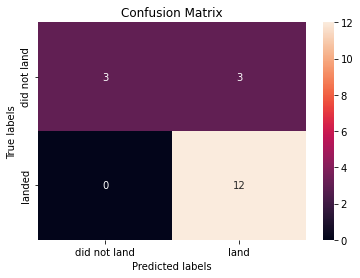

In [24]:
#KNN Confusion Matrix
knn_yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,knn_yhat)


#Look at Classification Report and metrics
np.set_printoptions(precision=2)
print (classification_report(Y_test, knn_yhat))

#Predict KNN using test dataset & get metrics
pred_knn = knn_cv.predict(X_test)
#SVM Metrics
knn_jaccard = metrics.accuracy_score(Y_test, pred_knn)
knn_f1 = f1_score(Y_test, pred_knn, average='weighted')

#Print Metrics 
print("Test set KNN Jaccard Accuracy: ", knn_jaccard)
print("Test set KNN F1 Accuracy:" , knn_f1)

## TASK  12


Find the method performs best:


In [25]:
#Print Report
print(" ")
print(" ")
print("*********************************** EVALUATING MODEL PREFORMANCE ************************************************")
print(" ")
print("                        Best_Params        Accuracy_Score             Jaccard                   F1-Score              Logloss      ")
print("KNN                ", best_params_knn , " ", knn_accscore , "   ", knn_jaccard , "       ",  knn_f1 , "             N/A")
print("Decision Tree      ", '%.16f' % best_params_dt , " ", tree_accscore , "   ", dt_jaccard , "       ", dt_f1 , "             N/A")
print("SVM                ", best_params_svm , " ", svm_accscore ,"   ", svm_jaccard , "       ",  svm_f1 , "             N/A")
print("Logistic Regression", best_params_lr , " ", logreg_accscore ,"   ", lr_jaccard , "       ", lr_f1 , "   ", lr_logloss)
print(" ")
print("******************************************************************************************************************")
print("The best model is the model with the best params score of: ", max(best_params_knn, best_params_dt, best_params_svm, best_params_lr))
print("The best model is the model with the highest accuracy score of: ", max(knn_accscore, tree_accscore, svm_accscore, logreg_accscore))
print("The best model is the model with the jaccard score of: ", max(knn_jaccard, dt_jaccard, svm_jaccard, lr_jaccard))

 
 
*********************************** EVALUATING MODEL PREFORMANCE ************************************************
 
                        Best_Params        Accuracy_Score             Jaccard                   F1-Score              Logloss      
KNN                 0.8482142857142858   0.8333333333333334     0.8333333333333334         0.8148148148148149              N/A
Decision Tree       0.8750000000000000   0.8888888888888888     0.8888888888888888         0.8888888888888888              N/A
SVM                 0.8482142857142856   0.8333333333333334     0.8333333333333334         0.8148148148148149              N/A
Logistic Regression 0.8464285714285713   0.8333333333333334     0.8333333333333334         0.8148148148148149     0.4786666968559153
 
******************************************************************************************************************
The best model is the model with the best params score of:  0.875
The best model is the model with the highest accura

In [28]:
# Create a list containing accuracy scores of the four models:
accscore = [knn_accscore, tree_accscore, svm_accscore, logreg_accscore]

#Crease a list with the 4 classification types
classification = [ 'K Nearest Neighbour', 'Decision Tree' , 'Support Vector Machine', 'Logistic Regression']

#Create a dictionary for the clasifications and accuracy scores
model_score = {'Machine Learning Classification':classification, 'Accuracy Score':accscore}

#Create a pandas dataframe from the dictionary to plot with
df_modelscore= pd.DataFrame(model_score)
df_modelscore


,Machine Learning Classification,Accuracy Score
0,K Nearest Neighbour,0.833333
1,Decision Tree,0.888889
2,Support Vector Machine,0.833333
3,Logistic Regression,0.833333


<AxesSubplot:title={'center':'Classification Models Accuracy'}, xlabel='Machine Learning Classification', ylabel='Accuracy Scores'>

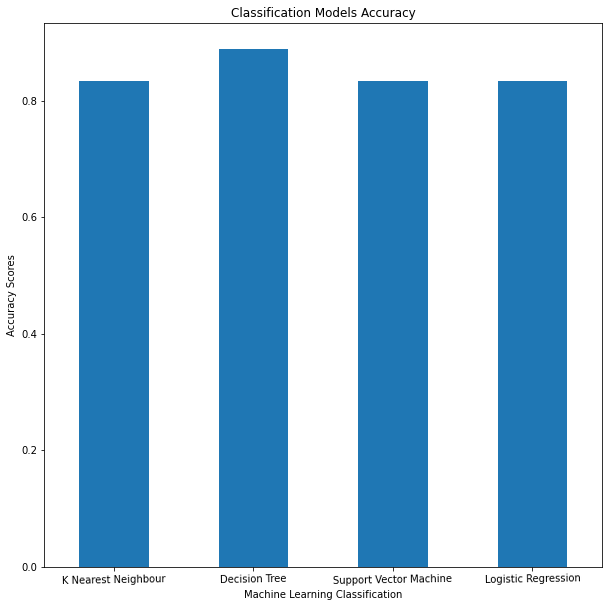

In [32]:
# Plot a bar chart
df_modelscore.plot(kind='bar', x='Machine Learning Classification', y='Accuracy Score', ylabel='Accuracy Scores', figsize=(10,10), 
                   legend=None, rot= 1, title='Classification Models Accuracy')


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
